# Framingham Heart Disease Data

In [3]:
df = pd.read_csv("C:\\Users\\ysaru\\Desktop\\Datasets\\framingham_heart_disease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.drop(['education'], axis=1, inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
#df.drop('education', axis=1, inplace=True)

In [9]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [81]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [11]:
from imblearn.combine import SMOTETomek

In [12]:
smk = SMOTETomek(random_state=0)
Xo, yo = smk.fit_resample(X,y)

In [13]:
Xo.shape, yo.shape

((6296, 14), (6296,))

In [14]:
from collections import Counter
print('target variable count before {}'.format(Counter(y)))
print('target variable count after {}'.format(Counter(yo)))

target variable count before Counter({0: 3177, 1: 572})
target variable count after Counter({0: 3148, 1: 3148})


In [15]:
X_traino, X_testo, y_traino, y_testo = train_test_split(Xo, yo, test_size=0.3, random_state=0)

In [16]:
scaler = StandardScaler()

X_traino = scaler.fit_transform(X_traino)
X_testo = scaler.transform(X_testo)
X_traino.shape

(4407, 14)

In [17]:
X_testo.shape

(1889, 14)

## AdaBoost Classifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(X_traino,y_traino)
y_ada = adaboost.predict(X_testo)

In [49]:
from sklearn.metrics import precision_score

print(accuracy_score(y_testo, y_ada))
print(f1_score(y_testo, y_ada))
print(recall_score(y_testo, y_ada))
print(precision_score(y_testo,y_ada))

0.7448385389094759
0.7444326617179214
0.7460148777895855
0.7428571428571429


In [44]:
ada = AdaBoostClassifier()
param = {'n_estimators':[50,100,150],
         'learning_rate':[0.1,1,5,10]}

clf_ada = GridSearchCV(ada, param_grid=param, cv=10)

In [45]:
clf_ada.fit(X_traino,y_traino)
(clf_ada.best_params_)

{'learning_rate': 1, 'n_estimators': 150}

In [46]:
y_ada1 = clf_ada.predict(X_testo)

In [47]:
print(accuracy_score(y_testo, y_ada1))
print(f1_score(y_testo, y_ada1))
print(recall_score(y_testo, y_ada1))
print(precision_score(y_testo,y_ada1))

0.7554261514028586
0.7510775862068967
0.740701381509033
0.7617486338797814


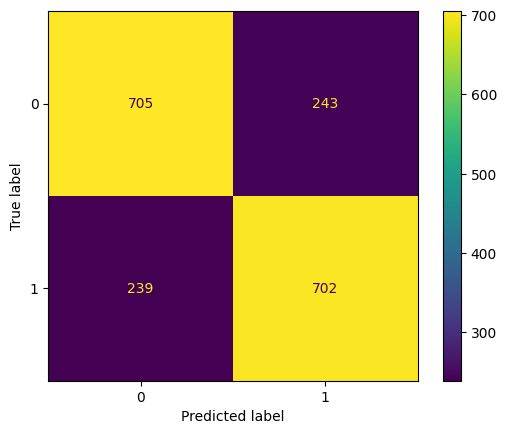

In [29]:
ConfusionMatrixDisplay.from_predictions(y_testo, y_ada)

## Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()

param = {'n_estimators':[50,100,150],
         'learning_rate':[0.01,0.05,0.1,0.2,0.5,0.8]}

gbc1 = GridSearchCV(gbc, param_grid=param, cv=10)

In [36]:
gbc1.fit(X_traino,y_traino)
print(gbc1.best_params_)

{'learning_rate': 0.5, 'n_estimators': 150}


In [37]:
y_gbc = gbc1.predict(X_testo)

print(accuracy_score(y_testo, y_gbc))
print(f1_score(y_testo, y_gbc))
print(recall_score(y_testo, y_gbc))
print(precision_score(y_testo,y_gbc))

0.8655373213340392
0.8618063112078346
0.8416578108395324
0.882943143812709


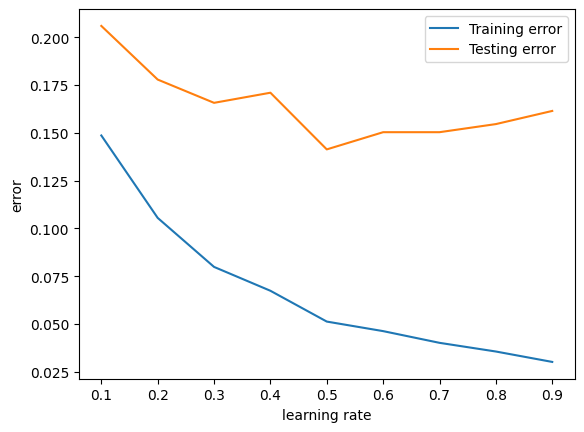

In [42]:
from sklearn.metrics import zero_one_loss

er_tr = []
er_te = []

learn_rate = np.arange(0.1,1,0.1)

for i in range(len(learn_rate)):
    clf_gb = GradientBoostingClassifier(learning_rate = learn_rate[i])
    clf_gb.fit(X_traino, y_traino)
    
    er_tr.append(zero_one_loss(y_traino, clf_gb.predict(X_traino)))
    er_te.append(zero_one_loss(y_testo, clf_gb.predict(X_testo)))
    
plt.plot(learn_rate,er_tr,label='Training error')
plt.plot(learn_rate,er_te,label='Testing error')
plt.xlabel('learning rate')
plt.ylabel('error')
plt.legend()
plt.show()

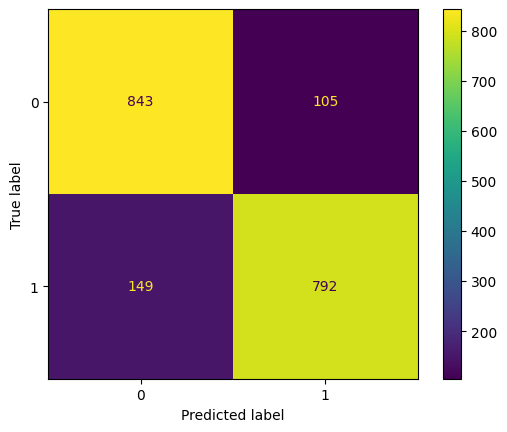

In [43]:
ConfusionMatrixDisplay.from_predictions(y_testo,y_gbc)

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb = XGBClassifier(eta=0.2, gamma=5)
xgb.fit(X_traino,y_traino)
y_xgb = xgb.predict(X_testo)

In [52]:
print(accuracy_score(y_testo, y_xgb))
print(f1_score(y_testo, y_xgb))
print(recall_score(y_testo, y_xgb))
print(precision_score(y_testo,y_xgb))

0.8104817363684489
0.8091684434968018
0.8065887353878852
0.8117647058823529


## Support Vector Machines

In [51]:
svc = SVC()

params = [{'kernel':['linear'], 'C':(np.arange(0.1,1,0.1))},
          {'kernel':['rbf'], 'C':(np.arange(0.1,1,0.1)), 'gamma':(np.arange(0.01,0.1,0.01))},
          {'kernel':['poly'], 'C':(np.arange(0.1,1,0.1)), 'degree':[2,3,4,5]}]

svm_model1 = GridSearchCV(svc, params, cv=10, scoring='accuracy')

In [52]:
svm_model1.fit(X_traino, y_traino)
svm_model1.best_score_

0.7428968253968253

In [53]:
print(svm_model1.best_params_)

{'C': 0.9, 'gamma': 0.09, 'kernel': 'rbf'}


In [54]:
y_predo = svm_model1.predict(X_testo)
print(accuracy_score(y_testo, y_predo))

0.7263102170460561


In [59]:
from sklearn.metrics import f1_score, recall_score, roc_auc_score

print(f1_score(y_testo, y_predo))
print(recall_score(y_testo, y_predo))

0.7339166237776634
0.7577045696068013


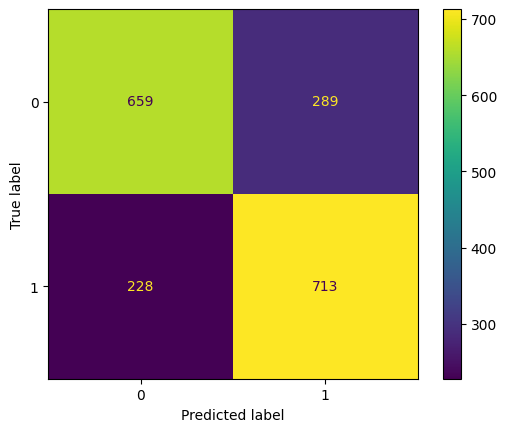

In [60]:
ConfusionMatrixDisplay.from_predictions(y_testo, y_predo)

In [63]:
svm_model2 = GridSearchCV(svc, params, cv=10, scoring='f1')

In [64]:
svm_model2.fit(X_traino, y_traino)
print(svm_model2.best_score_)

0.7533335056707078


In [65]:
print(svm_model2.best_params_)

{'C': 0.9, 'gamma': 0.08, 'kernel': 'rbf'}


In [66]:
y_predo2 = svm_model2.predict(X_testo)
print(accuracy_score(y_testo, y_predo2))
print(f1_score(y_testo, y_predo2))
print(recall_score(y_testo, y_predo2))

0.725780836421387
0.7327141382868938
0.7545164718384697


In [68]:
print(roc_auc_score(y_testo, y_predo2))

0.7258869279023573


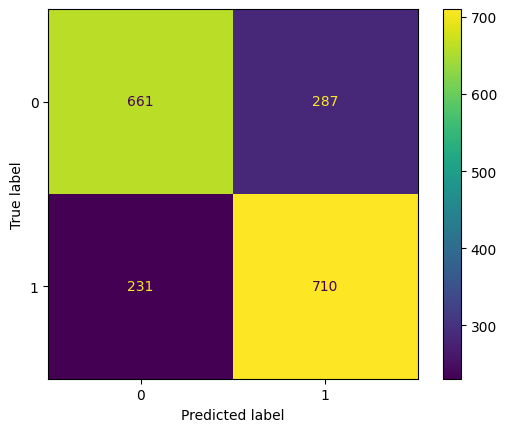

In [67]:
ConfusionMatrixDisplay.from_predictions(y_testo, y_predo2)

In [109]:
param = [{'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10]},
          {'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10], 'gamma':[0.001, 0.01, 0.1, 1]},
          {'kernel':['poly'], 'C':[0.001, 0.01, 0.1, 1, 10], 'degree':[2,3,4,5]}]

In [110]:
svm_model3 = GridSearchCV(svc, param_grid=param, cv=10)

In [111]:
svm_model3.fit(X_traino, y_traino)
#print(svm_model3.best_score_)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10],
                          'degree': [2, 3, 4, 5], 'kernel': ['poly']}])

In [112]:
print(svm_model3.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [113]:
y_predo3 = svm_model3.predict(X_testo)
print(accuracy_score(y_testo, y_predo3))
print(f1_score(y_testo, y_predo3))
print(recall_score(y_testo, y_predo3))
print(roc_auc_score(y_testo, y_predo))

0.8602435150873478
0.8603174603174604
0.8639744952178533
0.7264261244658479


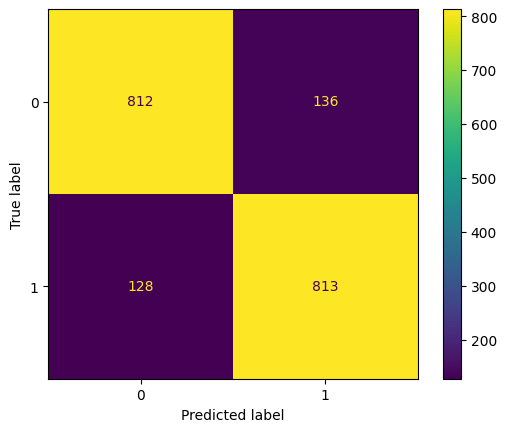

In [114]:
ConfusionMatrixDisplay.from_predictions(y_testo, y_predo3)

In [71]:
#print(svm_model3.best_params_)

{'C': 0.7000000000000001, 'gamma': 0.09, 'kernel': 'rbf'}


In [72]:
'''y_predo3 = svm_model3.predict(X_testo)
print(accuracy_score(y_testo, y_predo3))
print(f1_score(y_testo, y_predo3))
print(recall_score(y_testo, y_predo3))
print(roc_auc_score(y_testo, y_predo))'''

0.7231339332980413
0.7311053984575836
0.7555791710945803
0.7264261244658479


## Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(random_state=0)

params = {'min_samples_split':(np.arange(2,15)),
          'min_samples_leaf':(np.arange(1,10))}

dt = GridSearchCV(dtree, param_grid=params, cv=10)

In [116]:
dt.fit(X_traino, y_traino)
dt.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [98]:
print(dt.best_params_)

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 7}


In [117]:
y_predt = dt.predict(X_testo)
print(accuracy_score(y_testo,y_predt))
print(f1_score(y_testo, y_predt))
print(recall_score(y_testo, y_predt))
print(roc_auc_score(y_testo, y_predt))

0.7734250926416093
0.7793814432989692
0.8034006376195537
0.7735357618477515


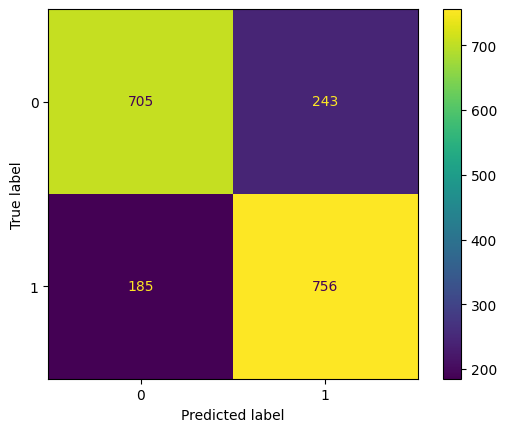

In [118]:
ConfusionMatrixDisplay.from_predictions(y_testo, y_predt)

## Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rfc = RandomForestClassifier(random_state=0)

params1 = {'n_estimators':[50,100,150],
           'max_depth':[5,10,15,20,30],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4]}

rf = GridSearchCV(rfc, param_grid=params1, cv=10)

In [121]:
rf.fit(X_traino, y_traino)
rf.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [106]:
print(rf.best_params_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [122]:
y_predr = rf.predict(X_testo)
print(accuracy_score(y_testo,y_predr))
print(f1_score(y_testo, y_predr))
print(recall_score(y_testo, y_predr))
print(roc_auc_score(y_testo, y_predr))

0.8771836950767602
0.8777660695468914
0.8852284803400637
0.8772133962881755


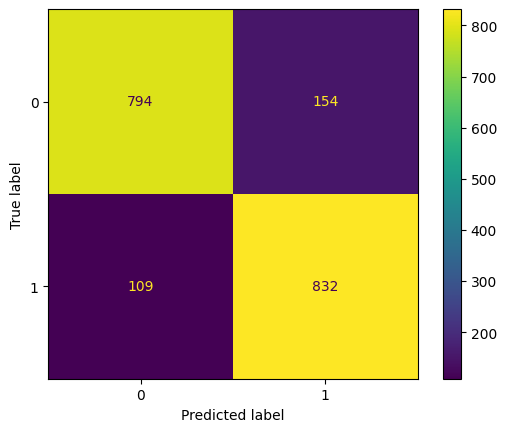

In [108]:
ConfusionMatrixDisplay.from_predictions(y_testo, y_predr)

# K nearest neighbors(KNN)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred_knn))

0.9716088328075709
